In [1]:
import os, gensim

def iter_documents(top_directory):
    """Iterate over all documents, yielding a document (=list of utf8 tokens) at a time."""
    for root, dirs, files in os.walk(top_directory):
        for file in filter(lambda file: file.endswith('.txt'), files):
            document = open(os.path.join(root, file), encoding='utf8').read() # read the entire document, as one big string
            yield gensim.utils.tokenize(document, lower=True) # or whatever tokenization suits you

class MyCorpus(object):
    def __init__(self, top_dir):
        self.top_dir = top_dir
        self.dictionary = gensim.corpora.Dictionary(iter_documents(top_dir))
        self.dictionary.filter_extremes(no_below=1, keep_n=30000) # check API docs for pruning params

    def __iter__(self):
        for tokens in iter_documents(self.top_dir):
            yield self.dictionary.doc2bow(tokens)

            
folder = 'Full_Text'       

corpus = MyCorpus(folder) # create a dictionary

In [2]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np

os.environ['DTM_PATH'] = r"dtm-win64.exe"

if not os.environ.get('DTM_PATH', None):
    raise ValueError("SKIP: You need to set the DTM path")

In [3]:
import glob

time_seq = []

for year in range(2015, 2020):
    docs_num = len(glob.glob(folder + "\\" + str(year) + "*"))
    print(f"Year {year} has {docs_num} documents")
    time_seq.append(docs_num)

Year 2015 has 14 documents
Year 2016 has 15 documents
Year 2017 has 27 documents
Year 2018 has 26 documents
Year 2019 has 21 documents


In [4]:
time_seq

[14, 15, 27, 26, 21]

In [5]:
dtm_path = os.environ['DTM_PATH']

In [6]:
num_topics = 5

model = DtmModel(dtm_path, corpus, time_seq, num_topics=num_topics,
                 id2word=corpus.dictionary, initialize_lda=True)

In [7]:
topic_list = []
show_top = 7

for id in range(num_topics):
    topic = [model.show_topic(topicid=id, time=time, topn=show_top) for time in range(5)]
    topic_list.append(topic)

In [8]:
topic_list[0]

[[(0.01025710634095076, 'units'),
  (0.008773038619014637, 'award'),
  (0.0078074307096945295, 'associate'),
  (0.00587241768205216, 'participants'),
  (0.00549943760873487, 'option'),
  (0.005300119471119371, 'rights'),
  (0.005163850797933706, 'rsus')],
 [(0.008995578511191508, 'units'),
  (0.00893796386079742, 'award'),
  (0.007098237426847821, 'associate'),
  (0.0064123703312030595, 'participants'),
  (0.005577561031122942, 'rights'),
  (0.005163245609252033, 'affiliate'),
  (0.005151705633789985, 'participant')],
 [(0.008270522330572898, 'award'),
  (0.007526189063256867, 'participants'),
  (0.006649657005619222, 'units'),
  (0.00611535757875594, 'associate'),
  (0.006111335904151771, 'rights'),
  (0.005706516167856112, 'participant'),
  (0.00494934757508934, 'affiliate')],
 [(0.009289894595568334, 'participants'),
  (0.006805280830154132, 'award'),
  (0.00664760402668341, 'participant'),
  (0.0066109423831172305, 'purchaser'),
  (0.0065521376327001305, 'rights'),
  (0.00514935134

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

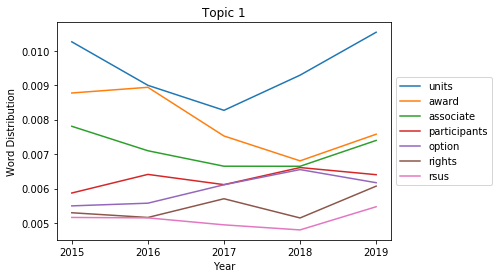

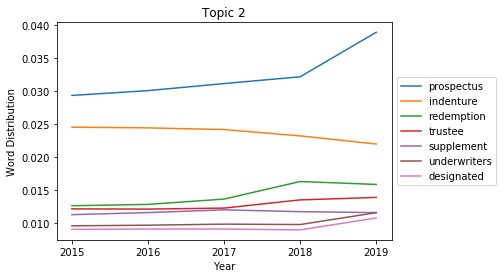

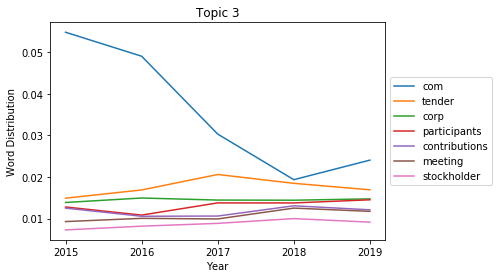

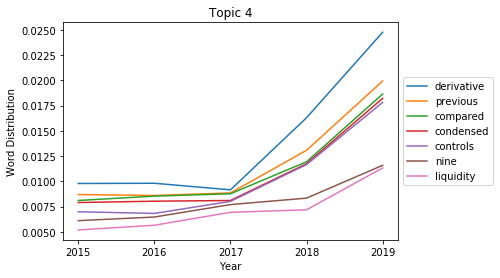

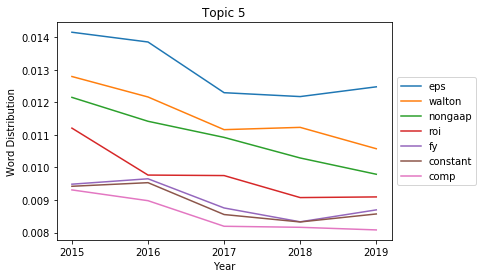

In [26]:
x = range(2015,2015+len(time_seq))

for index, topic in enumerate(topic_list):
    plt.title("Topic " + str(index+1))

    for word in range(show_top):
        prob = [sub[word] for sub in topic]
        values = [probability[0] for probability in prob]
        plt.plot(x, values, label = prob[0][1])
    
    plt.xticks(np.arange(2015, 2020, step = 1))
    plt.ylabel("Word Distribution")
    plt.xlabel("Year")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

In [11]:
for topic in range(num_topics):
    print(f'Topic {topic}')
    print(model.print_topics()[topic])
    print()

Topic 0
0.010*units + 0.009*award + 0.008*associate + 0.006*participants + 0.005*option + 0.005*rights + 0.005*rsus + 0.005*participant + 0.005*affiliate + 0.005*vesting

Topic 1
0.029*prospectus + 0.024*indenture + 0.013*redemption + 0.012*trustee + 0.011*supplement + 0.010*underwriters + 0.009*designated + 0.008*agent + 0.008*dtc + 0.007*holders

Topic 2
0.055*com + 0.015*tender + 0.014*corp + 0.013*participants + 0.013*contributions + 0.009*meeting + 0.007*stockholder + 0.007*cl + 0.007*person + 0.006*offers

Topic 3
0.010*derivative + 0.009*previous + 0.008*compared + 0.008*condensed + 0.007*controls + 0.006*nine + 0.005*liquidity + 0.005*repurchase + 0.005*roi + 0.005*court

Topic 4
0.014*eps + 0.013*walton + 0.012*nongaap + 0.011*roi + 0.009*fy + 0.009*constant + 0.009*comp + 0.009*bps + 0.008*proxy + 0.007*press

